In [1]:
model1 = {'dataDir':'../FYP-DLSRWF/notebooks/ResizedShuffled.npy',
         'testDir':'../FYP-DLSRWF/notebooks/PrecipitationResized2022.npy',
         'weightsDir':'../FYP-DLSRWF/extras/10ep-prec-8bs-resizeall-Done/64_5,5-32_3,3-32_1,1-8.h5',
         'layers':3,
         'filters':[64, 32, 32],
         'kSize':[(5,5),(3,3),(1,1)],
         'sqExp':True,
         'temp':False}
model2 = {'dataDir':'../FYP-DLSRWF/notebooks/ResizedTemperature.npy',
         'testDir':'../FYP-DLSRWF/notebooks/ResizedTemperature2022.npy',
         'weightsDir':'../FYP-DLSRWF/extras/25ep-temp-8bs-resized-Done/64_(5, 5)-32_(3, 3)-32_(1, 1)-8temp.h5',
         'layers':3,
         'filters':[64, 32, 32],
         'kSize':[(5,5),(3,3),(1,1)],
         'sqExp':False,
         'temp':True}
model3 = {'dataDir':'../FYP-DLSRWF/data/shuffled-81-21.npy',
         'testDir':'../FYP-DLSRWF/data/prec22.npy',
         'weightsDir':'../FYP-DLSRWF/extras/29ep-prec-shuff-bs5-Done/29ep-prec-shuff-bs5.h5',
         'layers':3,
         'filters':[64, 64, 64],
         'kSize':[(5,5),(3,3),(1,1)],
         'sqExp':True,
         'temp':False}
model4 = {'dataDir':'../FYP-DLSRWF/data/shuffled-81-21.npy',
         'testDir':'../FYP-DLSRWF/data/prec22.npy',
         'weightsDir':'../FYP-DLSRWF/extras/50ep-prec-2bs-Done/64_(5, 5)-32_(3, 3)-32_(1, 1)-3.h5',
         'layers':3,
         'filters':[64, 32, 32],
         'kSize':[(5,5),(3,3),(1,1)],
         'sqExp':True,
         'temp':False}
model5 = {'dataDir':'../FYP-DLSRWF/data/shuffled-81-21.npy',
         'testDir':'../FYP-DLSRWF/data/prec22.npy',
         'weightsDir':'../FYP-DLSRWF/extras/6ep-prec-3bs-shuffled/6ep-prec-3bs-shuffled.h5',
         'layers':3,
         'filters':[64, 64, 64],
         'kSize':[(5,5),(3,3),(1,1)],
         'sqExp':True,
         'temp':False}
model6 = {'dataDir':'../FYP-DLSRWF/notebooks/ResizedShuffled.npy',
         'testDir':'../FYP-DLSRWF/notebooks/PrecipitationResized2022.npy',
         'weightsDir':'../FYP-DLSRWF/extras/bs16-ep9-resizeall-Done/bs16-ep9-resizeall.h5',
         'layers':2,
         'filters':[64, 64],
         'kSize':[(5,5),(1,1)],
         'sqExp':False,
         'temp':False}

In [2]:
import sys
import os

import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import cv2
# plt.style.use('classic')

def addPath(path):
    module_path = path
    if module_path not in sys.path:
        sys.path.append(module_path)

addPath('../FYP-DLSRWF/model/')
addPath('../FYP-DLSRWF/utility/')

In [3]:
import ForecastingNetwork as fn
import process_data as prd
import plot
import animation

In [4]:
def sqExp(data):
  data = np.expand_dims(np.squeeze(data), axis=-1)
  return data

In [5]:
modelChoice = model2
xTrain, yTrain, xVal, yVal = prd.processData(modelChoice['dataDir'], 0.9)
test = prd.processData(modelChoice['testDir'])
# temp = prd.processData('data/temp2017.npy')
if (modelChoice['sqExp']):
    xTrain = sqExp(xTrain)
    yTrain = sqExp(yTrain)
    xVal = sqExp(xVal)
    yVal = sqExp(yVal)

Dimensions:  4
Shape:  (1826, 24, 51, 72)
Type:  int16
Dimensions:  4
Shape:  (212, 24, 51, 72)
Type:  int16


In [6]:
# plot.plotImageStack(0, test, cmap='jet')
# xTrain.shape

In [7]:
# xTrain2, yTrain2, xVal2, yVal2 = prd.processData('../FYP-DLSRWF/notebooks/ResizedShuffled.npy', 0.9)

In [8]:
# xTrain2.shape

In [9]:
layers = modelChoice['layers']
nFilters = modelChoice['filters']
kernelSize = modelChoice['kSize']
model = fn.getModel(xTrain, layers, nFilters, kernelSize)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 51, 72, 1)  0         
                             ]                                   
                                                                 
 stacked_network (StackedNet  (None, None, 51, 72, 1)  536545    
 work)                                                           
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| conv_lstm2d (ConvLSTM2D)  multiple                  416256    |
|                                                               |
| conv_lstm2d_1 (ConvLSTM2D)  multiple                110720    |
|                                                               |
| conv_lstm2d_2 (ConvLSTM2D)  multiple                8320      |
|                                                               |
| batch_normalization (BatchN  multiple               256    

In [10]:
model = fn.compileModel(model, losses.binary_crossentropy, optimizers.Adam())
# tf.keras.utils.plot_model(model, expand_nested=True)

In [11]:
# history = fn.train(model, (xTrain, yTrain, xVal, yVal), 3, 2)

In [12]:
model = fn.loadWeights(model, modelChoice['weightsDir'])

1/1 [==============================] - 1s 734ms/step


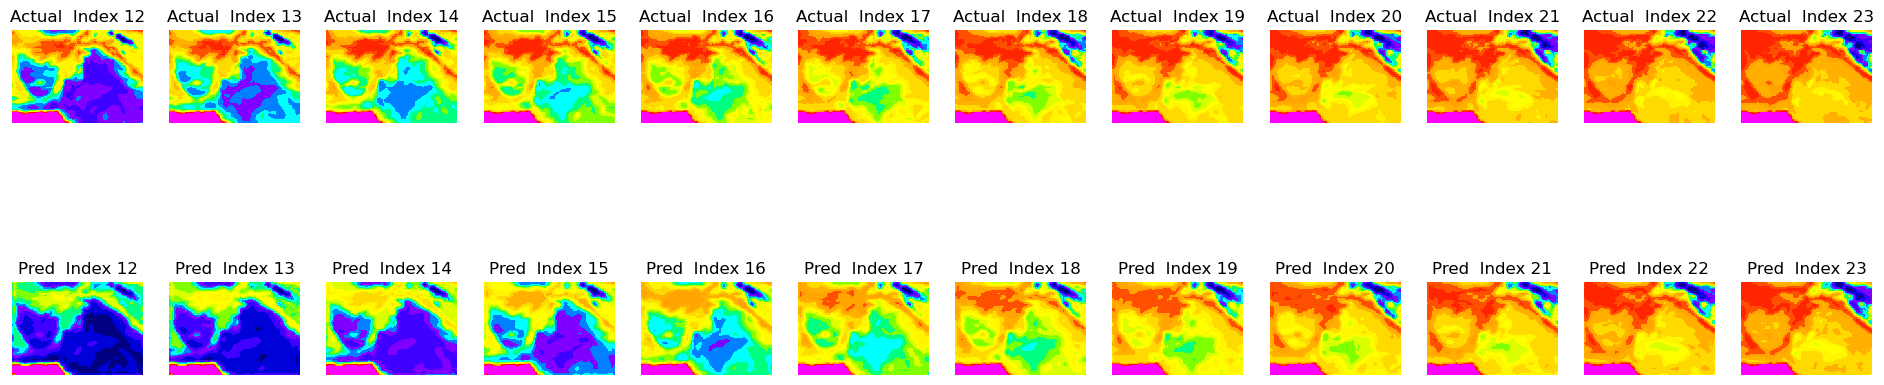

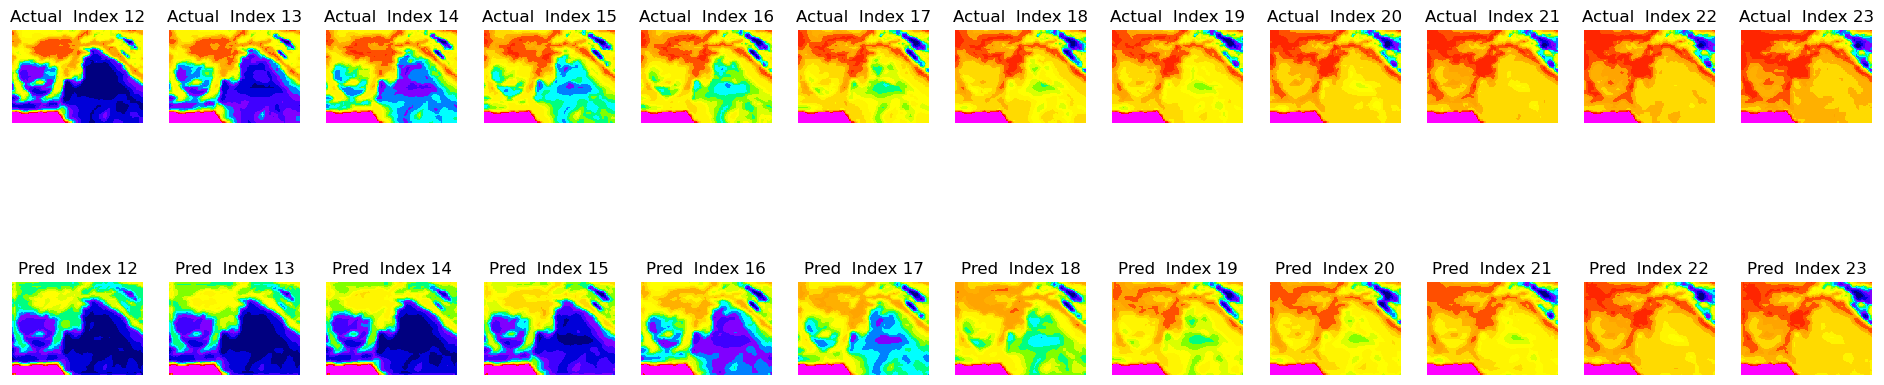

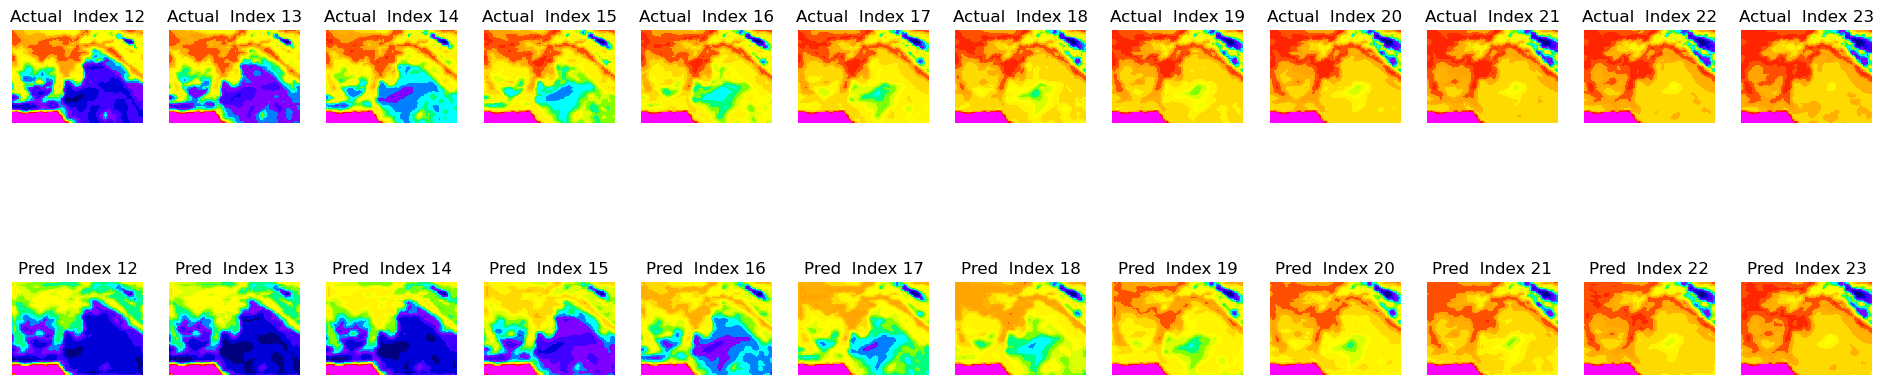

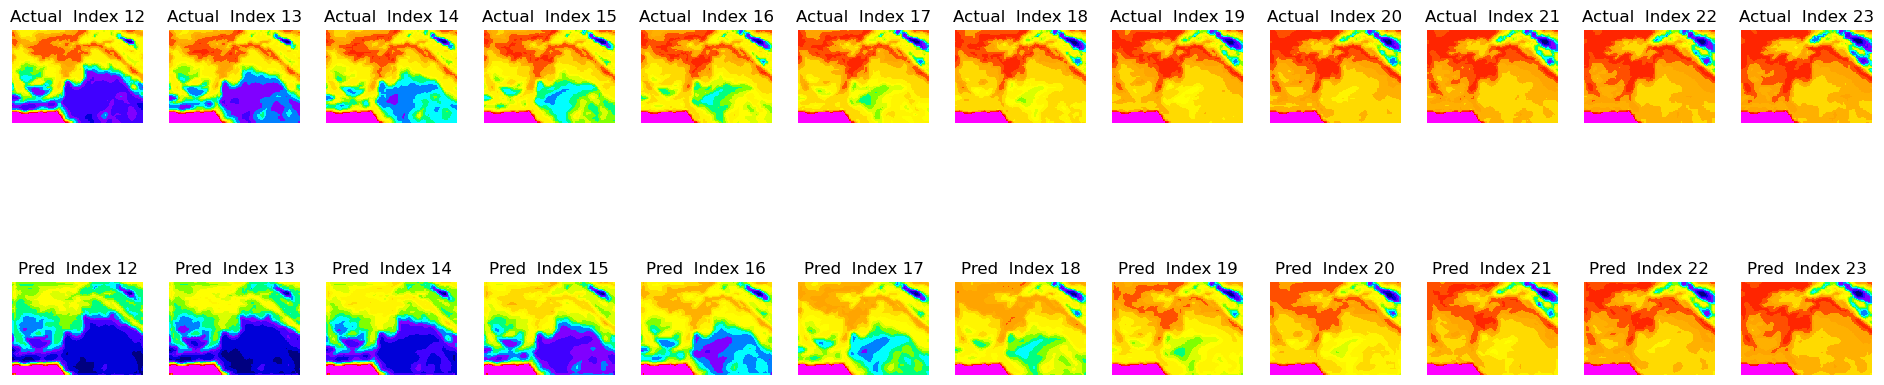

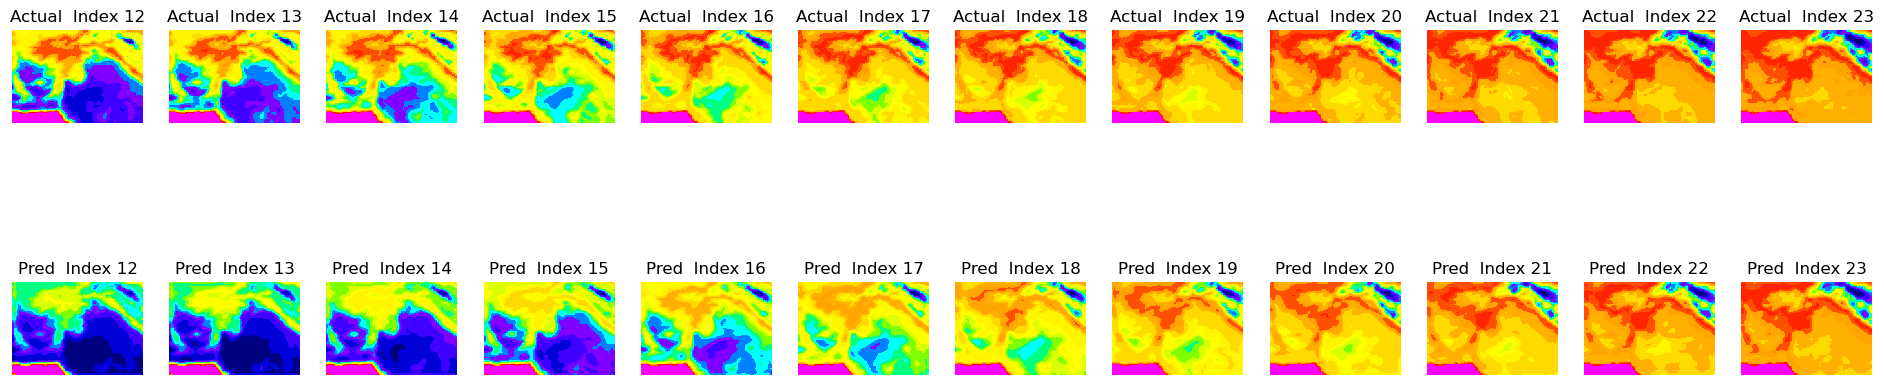

In [13]:
cmap = plot.getPrecCMap()
t = 'p'
if (modelChoice['temp']):
    cmap = plot.getTempCMap()
    t = 't'
    
for i in range(120, 125):
    index = i
    act, pred = fn.predict(model, test[index:index+1, :, ...][0], False, t) # True for Recursive and False for Non-Recursive and t for temperature
    act = act * 255
    pred = pred * 255

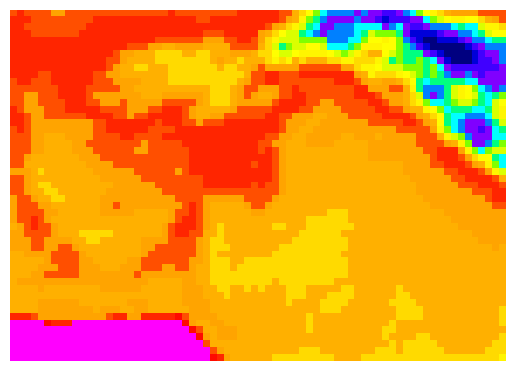

In [14]:
duration = 0.2
classic = 'o'
animation.generateColoredGIF(act, 'act.gif', duration, cmap=cmap ,plotType=classic)
animation.generateColoredGIF(pred, 'pred.gif', duration, cmap=cmap, plotType=classic)

In [15]:
from IPython.display import display, Image
Image('./anim/act.gif', width=400, height=400)

FileNotFoundError: No such file or directory: './anim/act.gif'

FileNotFoundError: No such file or directory: './anim/act.gif'

<IPython.core.display.Image object>

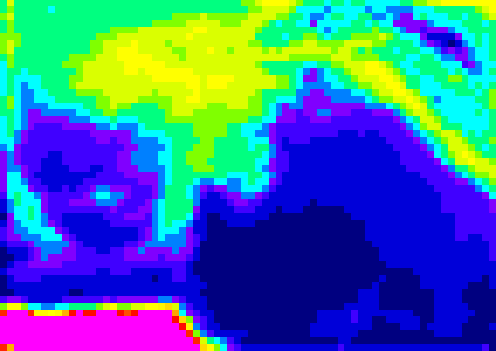

In [ ]:
from IPython.display import display, Image
Image('./anim/pred.gif', width=400, height=400)

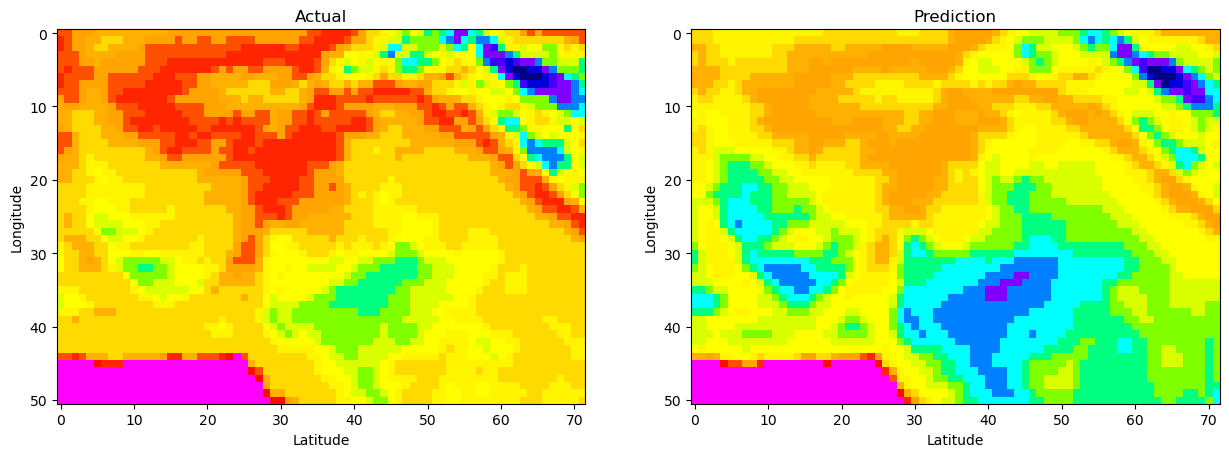

In [ ]:
# Plotting the Single Prediction w.r.t LatLng
import matplotlib.pyplot as plt
import numpy as np

timestep = 5
# 59.545898,23.155933,79.541016,37.439499

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

ax[0].set_title('Actual')
ax[0].imshow(act[timestep], cmap=cmap)
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')
# ax[0].set_xticks([1,2,3,4,5,6,7])

ax[1].set_title('Prediction')
ax[1].imshow(pred[timestep], cmap=cmap)
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Longitude')
plt.style.use('ggplot')

plt.show()

In [ ]:
fps = 4
animation.generateGIF(act, 'act.gif', fps)
animation.generateGIF(pred, 'pred.gif', fps)
animation.generateGIF(test[index:index+1, :, ...][0] * 255, 'comp.gif', fps)

MoviePy - Building file act.gif with imageio.


MoviePy - Building file pred.gif with imageio.


MoviePy - Building file comp.gif with imageio.


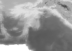

In [ ]:
from IPython.display import display, Image
Image('act.gif', width=500, height=500)

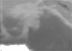

In [ ]:
from IPython.display import display, Image
# plt.imshow(pred[-1], cmap=plot.getTempCMap())
# plt.title('Prediction')
# plt.show()
Image('pred.gif', width=500, height=500)

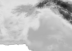

In [ ]:
from IPython.display import display, Image
Image('comp.gif', width=500, height=500)

In [ ]:
# plot.plotImageStack(-1, test, cmap=plot.getTempCMap())
# for i in range(30):
# plot.plotImageStack(index, test, cmap=plot.getPrecCMap())

In [ ]:
# plot.plotImageStack(81, temp, cmap=plot.getTempCMap())

In [ ]:
import folium
from folium import raster_layers
from folium.plugins import Fullscreen
from folium.plugins import FloatImage


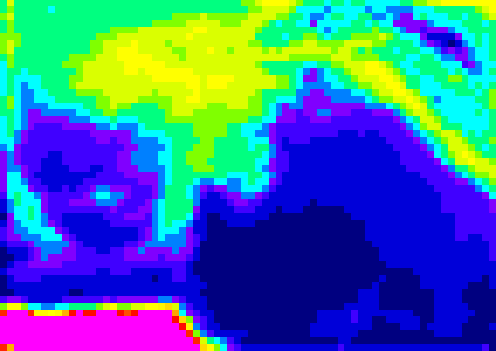

In [ ]:
m = folium.Map(location=[30.3753, 69.3451], zoom_start=5, tiles='OpenStreetMap')
# 59.545898,23.155933,79.541016,37.439499
raster_layers.ImageOverlay('./anim/pred.gif',
                    [[23.155933,59.545898],[37.439499,79.541016]],
                    opacity=0.6,
                   ).add_to(m)
folium.LayerControl().add_to(m)
if (t == 'p'):
    FloatImage('./images/legend_prec.png', bottom=0, left=75).add_to(m)
Fullscreen(position='topleft',title='Full Screen').add_to(m)
m

In [ ]:
# TODO


# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors

# n = 5 # how many lines to draw or number of discrete color levels

# x = np.linspace(0,1,5)

# # cmap = plt.get_cmap(plot.getPrecCMap(), n)

# for i in range(0,n):
#     plt.plot(i*x, color=cmap(i))

# norm= matplotlib.colors.BoundaryNorm(np.arange(0,n+1)-0.5, n)
# sm = plt.cm.ScalarMappable(cmap=plot.getPrecCMap(), norm=norm)
# sm.set_array([])
# plt.colorbar(sm, ticks=np.arange(0,n))
# plt.show()